# Projekt: Breast Cancer Diagnosis

This is a lab book from the project. It contains codes, plots and other information that is important for the project. 

Input dataset (Kaggle):  https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/download

Hypothesis: we can differentiate between Malign (M) and Bening (B) cancer, based on parameters measured by the patient#s doctor.

## Import of data from SQL

The table is already in SQL. I used PHPAdmin to export the table, the download went to Downloads/ folder, saved as .sql format. Next, I will import the table to PANDAS, using the following directions: https://stackoverflow.com/questions/32912373/importing-multiple-sql-tables-using-pandas 

In [1]:
import pandas as pd
import pandas.io.sql as psql
import pypyodbc

#Server: 127.0.0.1, via TCP/IP
#C:/Benutzer/Alfa/Dokumente/Costa_MB/Projekt/tbl_name.sql
    
#conn = pypyodbc.connect("DRIVER={SQL Server};\
#                        SERVER=serveraddress;\
#                        UID=uid;\
#                        PWD=pwd;\
#                        DATABASE=db")

#table_breast_cancer = pypyodbc.connect("DRIVER={SQL Server};\
 #                       SERVER=127.0.0.1;\
  #                      UID=alfa;\
   #                     PWD=C:/Benutzer/Alfa/Dokumente/Costa_MB/Projekt/;\
    #                    DATABASE=csv_db")

#df_breast_cancer = psql.read_frame('SELECT * FROM csv_db.tbl_name', table_breast_cancer)

ModuleNotFoundError: No module named 'pypyodbc'

We don't have any SQL Driver, so I will export the table with PHPAdmin and import it directly in a python object.

In [3]:
import pandas as pd
df = pd.read_csv("/home/bia/Documents/Courses/alphatraining/Big Data/project/breast_cancer_diagnostics/kaggle_breast-cancer-wisconsin.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Project: K-means for our data

In [5]:
#Create our data object "radius_mean"
#radius_mean = df.iloc[:,2]
radius_mean = df.values[:,2]

#print(radius_mean)
len(radius_mean)

NameError: name 'df' is not defined

In [43]:
from sklearn.cluster import KMeans

radius_mean_twodimensions = [[]]
radius_mean_twodimensions[0].append(radius_mean)
radius_mean_twodimensions[1].append(radius_mean)

#radius_mean_twodimensions.reshape(-1, 1)

kmeans = KMeans(n_clusters=1)
kmeans.fit(radius_mean)
y_kmeans = kmeans.predict(radius_mean_twodimensions)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black',s=200, alpha=0.5);

IndexError: list index out of range

I had a problem with our data, it was only one-dimensional, which does not fit to the puproses of the K-means method. I tried to artificially convert it to two-dimensions (one dimension duplicated into two), but this solution also did not work. I will drop this experiment for now, since it does not seem to make sense anyway to apply the K-means to our data. 

# Normalisation of data

After discussing the data and the project with Anatol, we learned that for many classification problems, one should be aware of the dimension problem. This is relevant for our project. Our data has different parameters, measures in each column, with different unities (dimensions). We cannot apply a machine learning method, such as Neural Networks, directly on such data, since the different dimensions will be summed up.

We have in addition to that the problem that the greatness of numbers change from column to column, which is a problem for many methods that compare them.

There is a simple solution that avoids both problems, which is the data normalzation. For that we can apply a simple mathematical formula in all columns:

    X_new(w) = (X(w) - mittelwert(X in der Probe)) / (standardabweichung von X in der Probe)
    
In this experiment, I will do this normalization manually, with in a python script.

In [5]:
#!pip install pandas #If needed 
import numpy as np

#for index, column in df.itercols():
#   calculate mittelwert
#   calculate standardabweichung

#for row, rows in df.iterrows():
#   calculate X_new for row
#   store X_new in new dataframe

#print(np.std(df.row[1]))

#Take a look at: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

ModuleNotFoundError: No module named 'numpy'

In [18]:
#normalized_df=(df-df.mean())/df.std()

df.mean()

id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [ ]:
#This code block formats the data for the plots in the next block

#Below I fixed the spaces in the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

#When I ran the plots below, python3 said that support for uppercase single-letter colors is deprecated, so 
#I substituted 'M' for 'm' and 'B' for 'b'
df.replace(to_replace ="B", 
                 value ="b") 

df.replace(to_replace ="M", 
                 value ="m") 

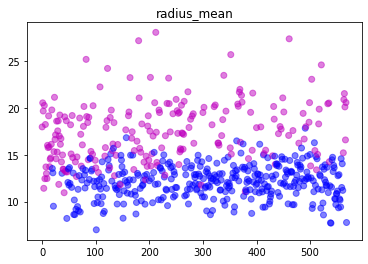

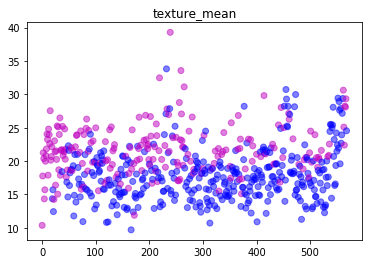

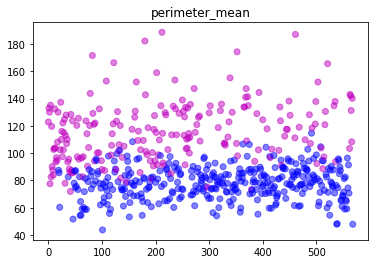

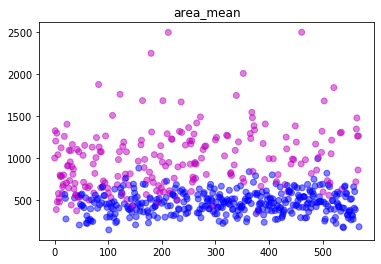

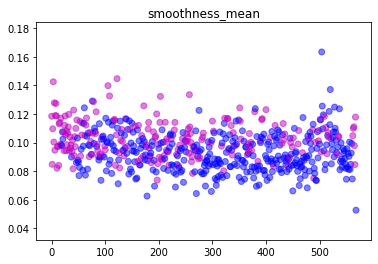

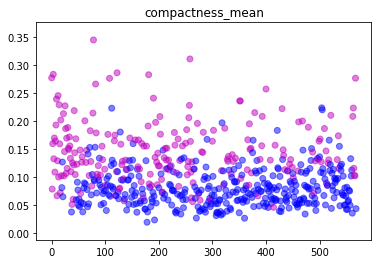

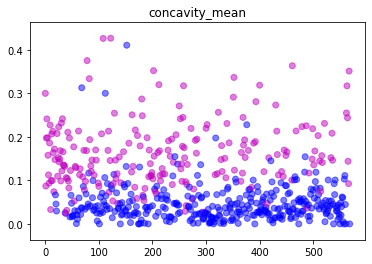

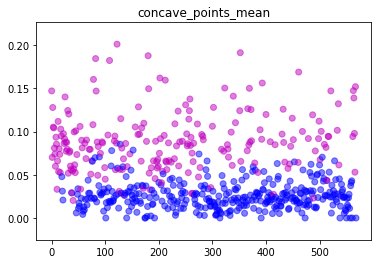

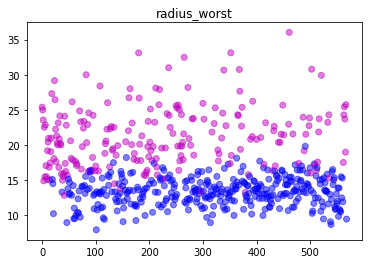

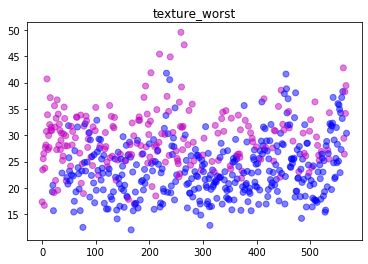

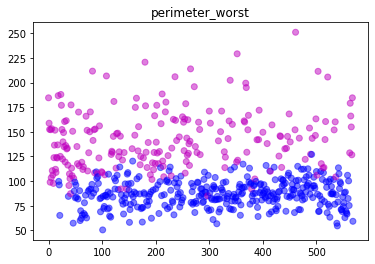

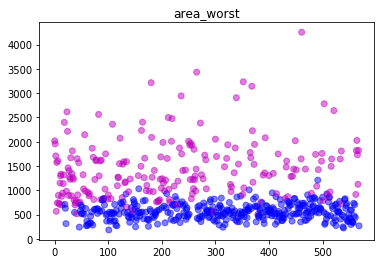

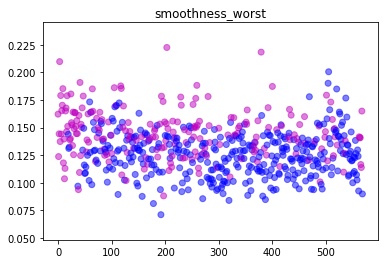

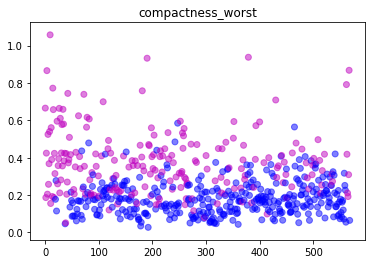

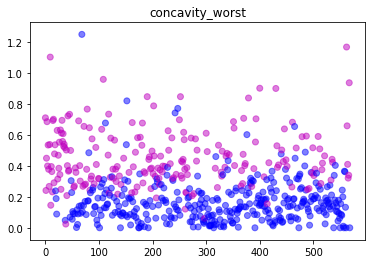

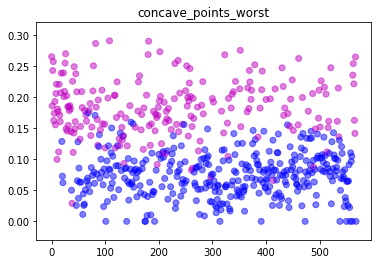

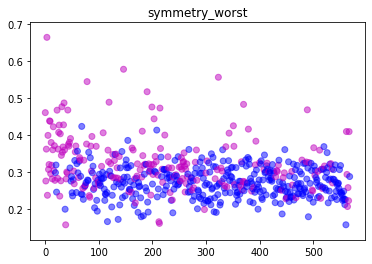

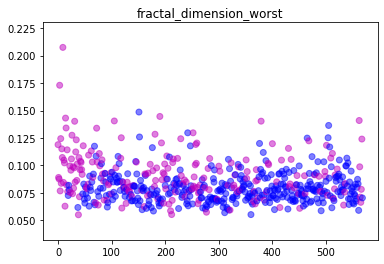

In [8]:
#Code fro Ulrike

import matplotlib.pyplot as plt

#The below plot shows the radius_mean grouped in two colours, one for each diagnosis 'M' and 'B', and we can see that the
#bigger radius clearly correlate with the worse diagnose

plt.scatter(x=df.index,y=df.radius_mean, color = df.diagnosis, alpha=0.5)
plt.title('radius_mean')
plt.show()

plt.scatter(x=df.index,y=df.texture_mean, color = df.diagnosis, alpha=0.5)
plt.title('texture_mean')
plt.show()

plt.scatter(x=df.index,y=df.perimeter_mean, color = df.diagnosis, alpha=0.5)
plt.title('perimeter_mean')
plt.show()

plt.scatter(x=df.index,y=df.area_mean, color = df.diagnosis, alpha=0.5)
plt.title('area_mean')
plt.show()

plt.scatter(x=df.index,y=df.smoothness_mean, color = df.diagnosis, alpha=0.5)
plt.title('smoothness_mean')
plt.show()

plt.scatter(x=df.index,y=df.compactness_mean, color = df.diagnosis, alpha=0.5)
plt.title('compactness_mean')
plt.show()

plt.scatter(x=df.index,y=df.concavity_mean, color = df.diagnosis, alpha=0.5)
plt.title('concavity_mean')
plt.show()

plt.scatter(x=df.index,y=df.concave_points_mean, color = df.diagnosis, alpha=0.5)
plt.title('concave_points_mean')
plt.show()

plt.scatter(x=df.index,y=df.radius_worst, color = df.diagnosis, alpha=0.5)
plt.title('radius_worst')
plt.show()

plt.scatter(x=df.index,y=df.texture_worst, color = df.diagnosis, alpha=0.5)
plt.title('texture_worst')
plt.show()

plt.scatter(x=df.index,y=df.perimeter_worst, color = df.diagnosis, alpha=0.5)
plt.title('perimeter_worst')
plt.show()

plt.scatter(x=df.index,y=df.area_worst, color = df.diagnosis, alpha=0.5)
plt.title('area_worst')
plt.show()

plt.scatter(x=df.index,y=df.smoothness_worst, color = df.diagnosis, alpha=0.5)
plt.title('smoothness_worst')
plt.show()

plt.scatter(x=df.index,y=df.compactness_worst, color = df.diagnosis, alpha=0.5)
plt.title('compactness_worst')
plt.show()

plt.scatter(x=df.index,y=df.concavity_worst, color = df.diagnosis, alpha=0.5)
plt.title('concavity_worst')
plt.show()

plt.scatter(x=df.index,y=df.concave_points_worst, color = df.diagnosis, alpha=0.5)
plt.title('concave_points_worst')
plt.show()

plt.scatter(x=df.index,y=df.symmetry_worst, color = df.diagnosis, alpha=0.5)
plt.title('symmetry_worst')
plt.show()

plt.scatter(x=df.index,y=df.fractal_dimension_worst, color = df.diagnosis, alpha=0.5)
plt.title('fractal_dimension_worst')
plt.show()

The table below summarizes the results from above. I analysed each of the figures visually and assigned a profile for each of them based on how well the two clusters (blue and pink) separate: (i) clusters are together; (ii) clusters are somewhat separated and (iii) clusters are separated. 

| Feature       | Cluster separation |
| ------------- |:-------------:|
| radius_mean   | separated |
| perimeter_mean | separated |
| area_mean | separated |
| radius_worst | separated |
| perimeter_worst | separated |
| area_worst | separated |
| texture_mean  | somewhat separated |
| compactness_mean | somewhat separated |
| concavity_mean | somewhat separated |
| concave_points_mean | somewhat separated |
| texture_worst | somewhat separated |
| compactness_worst | somewhat separated |
| concavity_worst | somewhat separated |
| concave points_worst | somewhat separated |
| smoothness_worst | together |
| smoothness_mean | together |
| symmetry_worst | together |
| fractal_dimension_worst | together |